### References
- https://estevestoni.medium.com/agrupando-conceitos-e-classificando-imagens-com-deep-learning-5b2674f99539
- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
- https://keras.io/examples/vision/image_classification_from_scratch/


In [67]:
import os

import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Read dataframe generated by the first notebook
df = pd.read_csv('./data/dataframe.csv', index_col='Unnamed: 0')
df

,filename,filepath,breed,extension,cat_or_dog
0,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg,Abyssinian,.jpg,cat
2,Abyssinian_101.jpg,./data/images/Abyssinian_101.jpg,Abyssinian,.jpg,cat
4,Abyssinian_102.jpg,./data/images/Abyssinian_102.jpg,Abyssinian,.jpg,cat
6,Abyssinian_103.jpg,./data/images/Abyssinian_103.jpg,Abyssinian,.jpg,cat
7,Abyssinian_104.jpg,./data/images/Abyssinian_104.jpg,Abyssinian,.jpg,cat
...,...,...,...,...,...
7388,yorkshire_terrier_96.jpg,./data/images/yorkshire_terrier_96.jpg,yorkshire_terrier,.jpg,dog
7389,yorkshire_terrier_97.jpg,./data/images/yorkshire_terrier_97.jpg,yorkshire_terrier,.jpg,dog
7390,yorkshire_terrier_98.jpg,./data/images/yorkshire_terrier_98.jpg,yorkshire_terrier,.jpg,dog
7391,yorkshire_terrier_99.jpg,./data/images/yorkshire_terrier_99.jpg,yorkshire_terrier,.jpg,dog


In [3]:
path = './data/pets/'
try:
    os.makedirs(name=path + 'cat')
    os.makedirs(name=path + 'dog')
    
    # Move images to their respective directories
    for index, data in df.iterrows():
        os.rename(src=data['filepath'],
                  dst=path+data['cat_or_dog']+'/'+data['filename'])
except FileExistsError:
    pass


In [4]:
input_shape = (128, 128, 3)
batch_size = 32

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/225,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               validation_split=0.2)

train_image_gen = image_gen.flow_from_directory('./data/pets', 
                                                subset='training',
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')

val_image_gen = image_gen.flow_from_directory('./data/pets', 
                                              subset='validation',
                                              target_size=input_shape[:2],
                                              batch_size = batch_size, 
                                              class_mode='binary')


Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [8]:
results = model.fit(train_image_gen, epochs=50, steps_per_epoch=75, validation_data=val_image_gen, validation_steps=15)

Epoch 1/50
75/75 [==============================] - 51s 663ms/step - loss: 0.6267 - accuracy: 0.6683 - val_loss: 0.6090 - val_accuracy: 0.6896
Epoch 2/50
75/75 [==============================] - 48s 640ms/step - loss: 0.6088 - accuracy: 0.6727 - val_loss: 0.6257 - val_accuracy: 0.6708
Epoch 3/50
75/75 [==============================] - 48s 642ms/step - loss: 0.5769 - accuracy: 0.6881 - val_loss: 0.5854 - val_accuracy: 0.6729
Epoch 4/50
75/75 [==============================] - 48s 643ms/step - loss: 0.5646 - accuracy: 0.6954 - val_loss: 0.5769 - val_accuracy: 0.6958
Epoch 5/50
75/75 [==============================] - 49s 652ms/step - loss: 0.5636 - accuracy: 0.7067 - val_loss: 0.5756 - val_accuracy: 0.6625
Epoch 6/50
75/75 [==============================] - 49s 652ms/step - loss: 0.5615 - accuracy: 0.6933 - val_loss: 0.5532 - val_accuracy: 0.6938
Epoch 7/50
75/75 [==============================] - 49s 646ms/step - loss: 0.5514 - accuracy: 0.7179 - val_loss: 0.5273 - val_accuracy: 0.7188

In [56]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['loss']

diff = [acc - val_acc for acc, val_acc in zip(accuracy, val_accuracy)]

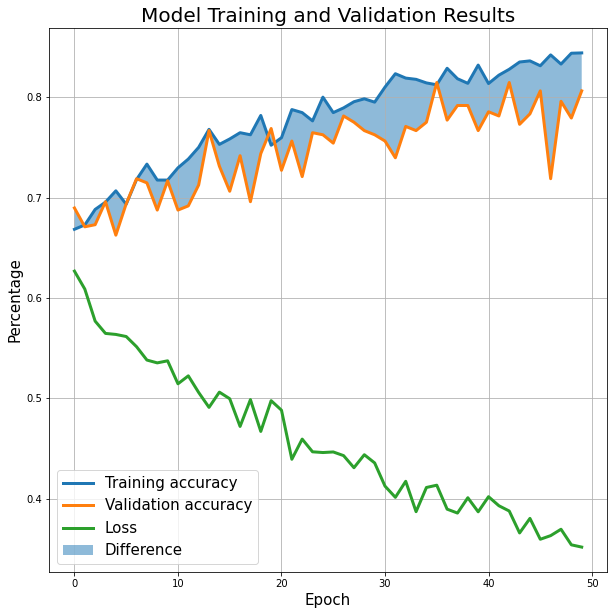

In [65]:
fig, ax1 = plt.subplots(figsize=(10, 10))
linewidth = 3
title_fontsize = 20
label_fontsize = 15

ax1.plot(results.epoch, accuracy, linewidth=linewidth, label='Training accuracy')
ax1.plot(results.epoch, val_accuracy, linewidth=linewidth, label='Validation accuracy')

ax1.plot(results.epoch, loss, linewidth=linewidth, label='Loss')

ax1.set_title('Model Training and Validation Results', fontsize=title_fontsize)
ax1.set_xlabel('Epoch', fontsize=label_fontsize)
ax1.set_ylabel('Percentage', fontsize=label_fontsize)
# ax1.plot(results.epoch, diff)
ax1.fill_between(results.epoch, accuracy, val_accuracy, alpha=.5, linewidth=0, label='Difference')

ax1.grid()
ax1.legend(fontsize=15)

plt.show()

**Accordingly to the plot above is possible to infer the model is overfitting due to the difference between the training and validation accuracy. The next steps of this work should be investigate why this overfitting is happening, some of the possible reasons are listed:**
- Low image number
- The model has excessive parameters

**Due to low computer resources it was not possible to refine this model. Beyond that, the accuracy shown above didn't stop growing, indicating that more epochs probably would lead to better results**